In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Some helpful Time-Series Visualization Customizations

In [2]:
# Load Data

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/starbucks.csv',
                 index_col = 'Date', parse_dates = True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


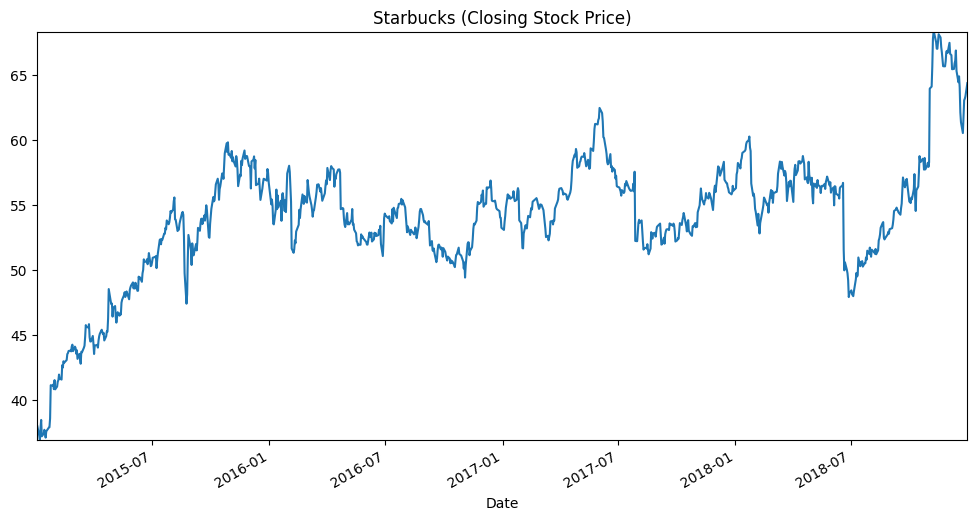

In [3]:
# Auto Scaling and Layout

ax = df['Close'].plot(figsize = (12,6), title = 'Starbucks (Closing Stock Price)')
ax.autoscale(axis = 'both', tight = True)

<Axes: xlabel='Date'>

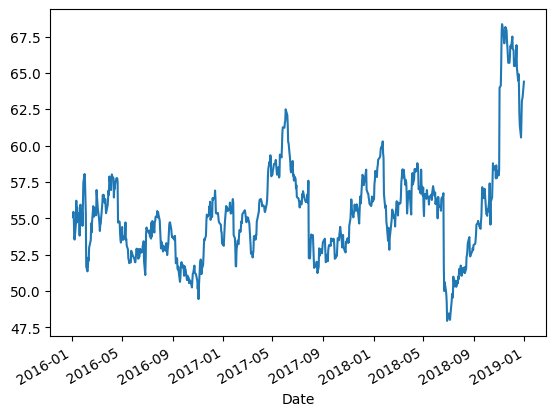

In [4]:
# Selecting Specific Time Frame (Year)

df['Close']['2016':].plot()

<Axes: xlabel='Date'>

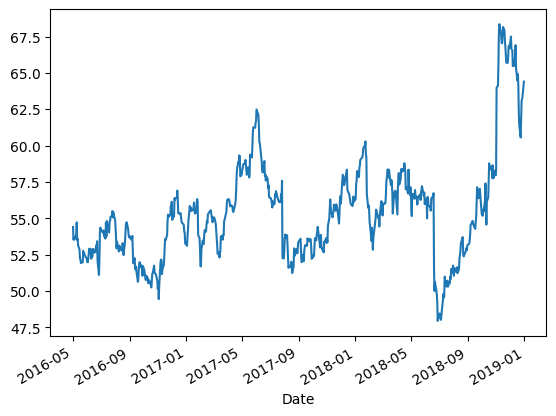

In [5]:
# Selecting Specific Time Frame (Year, Day)

df['Close']['2016-05':].plot()

<Axes: xlabel='Date'>

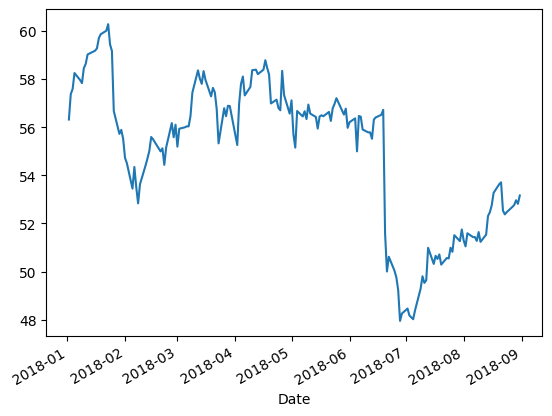

In [6]:
# Selecting Specific Time Frame (Specific Range)

df['Close']['2018-01-01': '2018-09-01'].plot()

<Axes: xlabel='Date'>

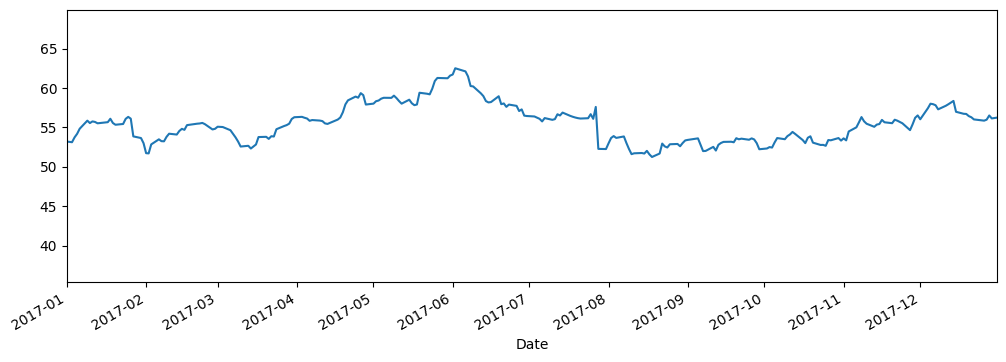

In [7]:
# Selecting Specific Time Frame (Specific Range using xlim), figsize = (12, 4)

df['Close'].plot(figsize = (12,4), xlim = ['2017-01-01', '2017-12-31']) # Plot level selection

<Axes: xlabel='Date'>

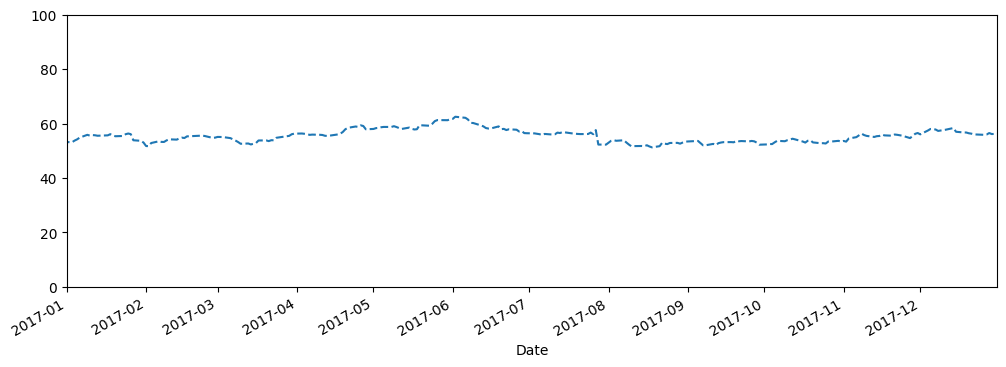

In [8]:
# Selecting Specific Time Frame (Specific Range using xlim, adding ylim), figsize = (12, 4)

df['Close'].plot(figsize = (12,4), xlim = ['2017-01-01', '2017-12-31'],
                 ylim = [0, 100], linestyle = "--") # Plot level selection

<Axes: xlabel='Date'>

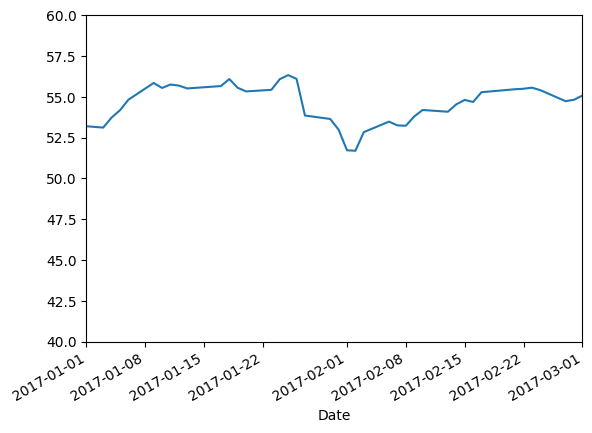

In [9]:
# xticks, y_ticks, etc.

from matplotlib import dates

df['Close'].plot(xlim = ['2017-01-01', '2017-03-01'], ylim = [40, 60])

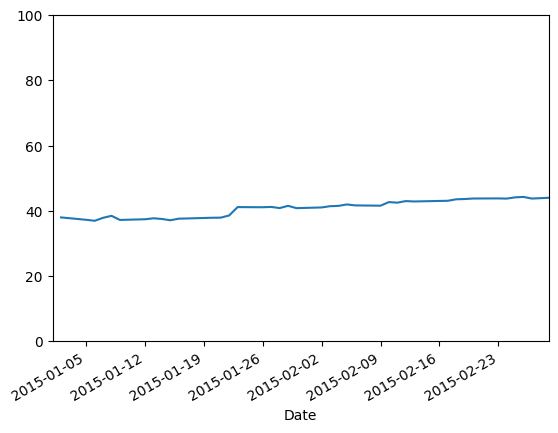

In [10]:
# set_major_locator

ax = df['Close'].plot(xlim = ['2015-01-01', '2015-03-01'], ylim = [0, 100])
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0)) # every week, start on Monday (0)

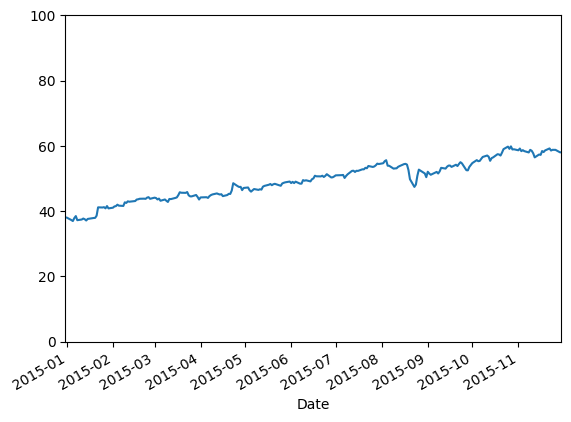

In [11]:
# set_major_locator

ax = df['Close'].plot(xlim = ['2015-01-01', '2015-12-01'], ylim = [0, 100])
ax.xaxis.set_major_locator(dates.MonthLocator(bymonthday = 2)) # every month, start at 2nd day

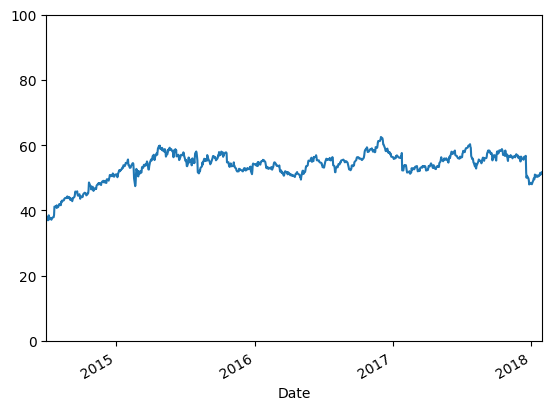

In [12]:
# set_major_locator

ax = df['Close'].plot(xlim = ['2015-01-01', '2018-08-01'], ylim = [0, 100])
ax.xaxis.set_major_locator(dates.YearLocator(base = 1, month = 7, day = 4)) # every year, 4th of July each year on x-axis

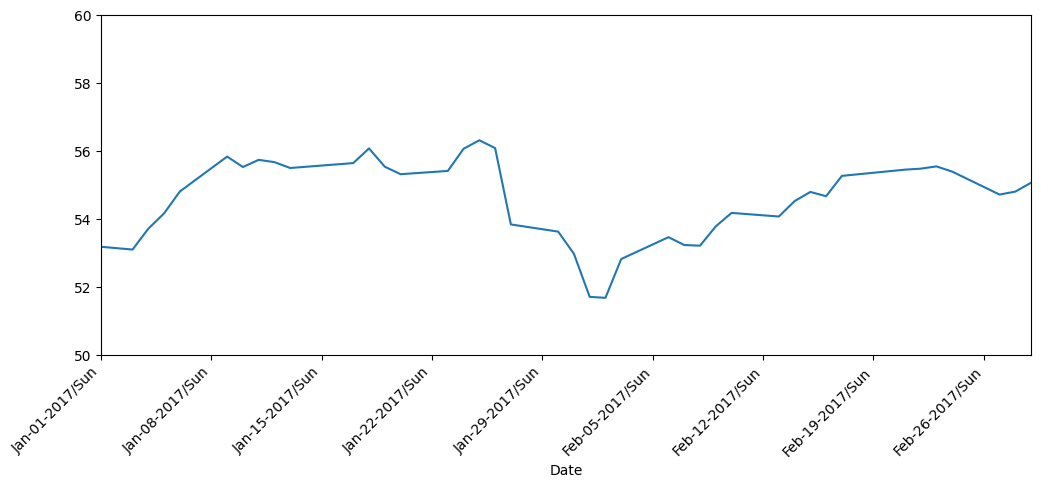

In [13]:
# set_major_formatter

ax = df['Close'].plot(xlim = ['2017-01-01', '2017-03-01'], ylim = [50, 60], rot = 45, figsize = (12,5))
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 6))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%d-%Y/%a'))

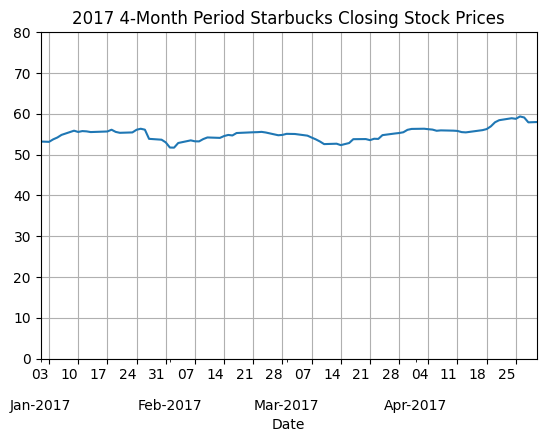

In [14]:
# Major and Minor Axis

ax = df['Close'].plot(xlim = ['2017-01-01','2017-04-30'], ylim = [0, 80], rot = 0 ,title = '2017 4-Month Period Starbucks Closing Stock Prices')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 1)) # Starts at Tuesday, Monday = 0
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b-%Y'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

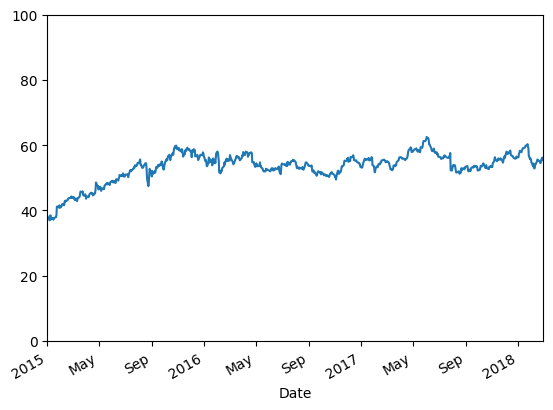

In [15]:
# ConciseDateFormatter()

ax = df['Close'].plot(xlim = ['2015-01-01', '2018-03-01'], ylim = [0, 100])
ax.xaxis.set_major_formatter(dates.ConciseDateFormatter(dates.MonthLocator())) # concise

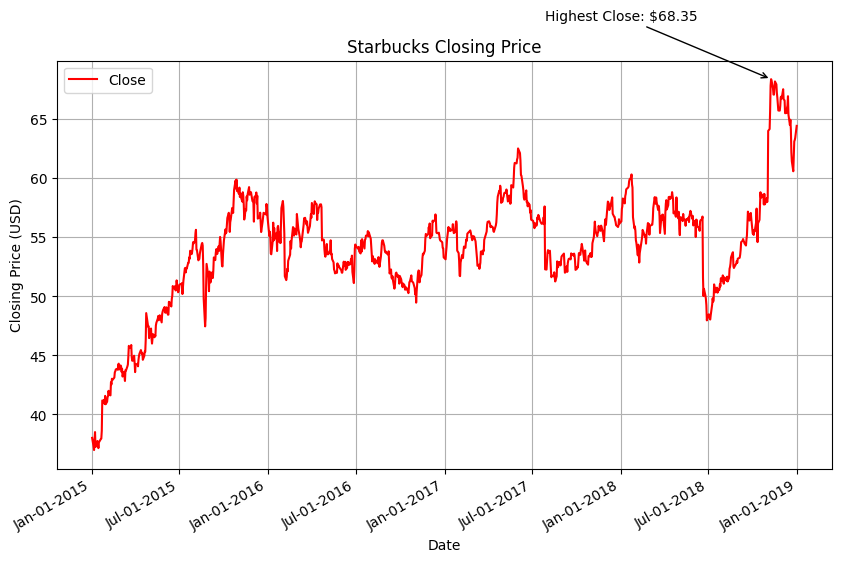

In [16]:
# Annotation

# Find the date and value of the highest 'Close' price

peak_close_date = df['Close'].idxmax()
peak_close_value = df['Close'].max()

# Plot the 'Close' column with annotation for the highest close value

ax = df['Close'].plot(figsize=(10, 6), color = 'red')
ax.set_title('Starbucks Closing Price')
ax.set_ylabel('Closing Price (USD)')

# Annotate the highest 'Close' price
ax.annotate(f'Highest Close: ${peak_close_value:.2f}', xy = (peak_close_date, peak_close_value),
            xytext=(peak_close_date - pd.DateOffset(months = 5), peak_close_value + 5),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='right')

ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%d-%Y'))

ax.legend()
ax.grid(True)

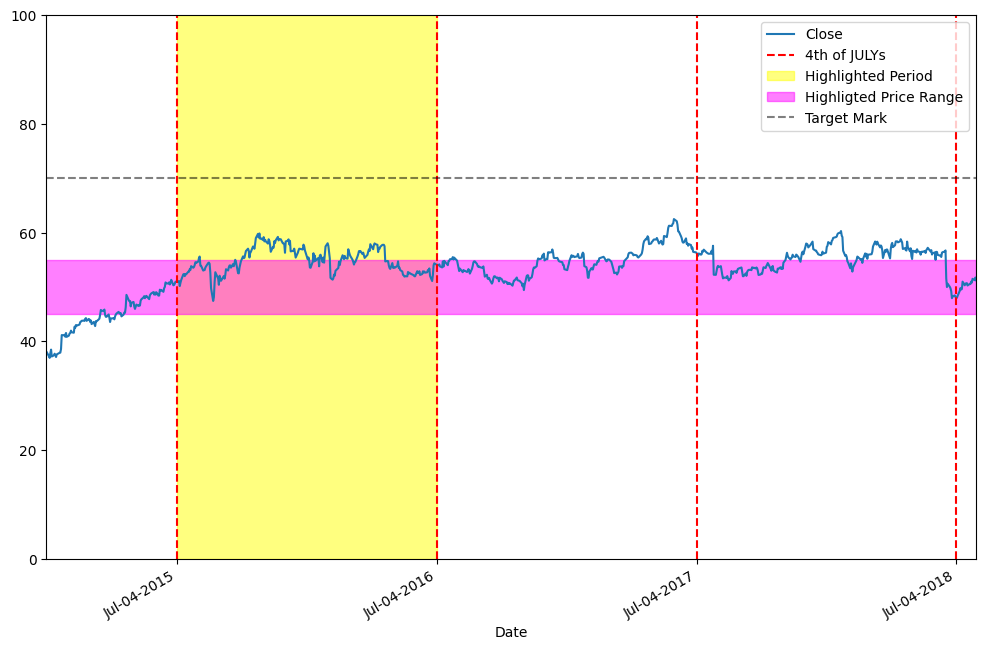

In [17]:
# Emphasis via Lines and Regions

important_dates = pd.to_datetime(['2015-07-04', '2016-07-04', '2017-07-04', '2018-07-04']) # 4th of JULYs

ax = df['Close'].plot(xlim = ['2015-01-01', '2018-08-01'], ylim = [0, 100], figsize = (12,8)) # Line Graph with Limits
ax.xaxis.set_major_locator(dates.YearLocator(base = 1, month = 7, day = 4)) # show every year, 4th of July each year on x-axis
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%d-%Y')) # Format of Dates on x-axis

for day in important_dates:

    ax.axvline(day, color = 'red', linestyle = '--', label = '4th of JULYs' if day == important_dates[0] else "") # iterate every 4th of July for each year (vertical lines)

ax.axvspan('2015-07-04', '2016-07-04', color='yellow', alpha = 0.5, label = 'Highlighted Period') # Vertical Span
ax.axhspan(45, 55, color = 'magenta', alpha = 0.5, label = 'Highligted Price Range') # Horizontal Span
ax.axhline(70, color = 'black', alpha = 0.5, label = 'Target Mark', linestyle = '--') # Horizontal Line

ax.legend()

In [18]:
# Great Job!